In [1]:
# importing some of required libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
train_set = pd.read_csv("F:/Study/KE Lab/competition/dengue_features_train.csv")

In [3]:
# Reading the class labels
label_set = pd.read_csv("F:/Study/KE Lab/competition/dengue_labels_train.csv")

In [4]:
label_set.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
# printing the first six columns
train_set.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
# Adding the total cases column to dataset
train_set['total_cases']=label_set['total_cases']

## PRE PROCESSING

In [7]:
# Function to replace the city values with numerics
def enc(x):
    if x=="sj":
        return 0
    else:
        return 1
train_set.city=train_set.city.apply(enc)

In [8]:
# The column week start date is string based and already year and weak of year columns are present . so we can remove this attribute
train_set.drop("week_start_date",axis=1,inplace=True)

In [9]:
# counting total no of columns
n=len(train_set.columns)
m=len(train_set.index)
print(n," ",m)

24   1456


In [10]:
# checking for null values
train_set.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [11]:
# the no of rows present in the dataset
print(len(label_set))

1456


In [12]:
# filling the null values with the respective means of the attributes 
columns=train_set.columns[3:23]
for i in columns:
    mean_c = train_set[i].mean()
    train_set[i].fillna(mean_c,inplace=True)

In [13]:
# Sclaing the values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set.iloc[:,7:23]=scaler.fit_transform(train_set.iloc[:,7:23])

In [14]:
# summary of the dataset
train_set.describe()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.357143,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,0.117154,0.537544,0.539183,...,0.597087,0.117154,0.575220,0.241736,0.615509,0.313248,0.371125,0.679096,0.072384,24.675137
std,0.479322,5.408314,15.019437,0.130827,0.117835,0.073299,0.083266,0.111418,0.179492,0.156473,...,0.174639,0.111418,0.175764,0.240892,0.135437,0.186035,0.125536,0.143713,0.086684,43.596000
min,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,0.055625,0.051367,0.155625,0.144718,0.025499,0.400472,0.419556,...,0.476186,0.025499,0.439726,0.066212,0.524316,0.177440,0.283871,0.587156,0.016289,5.000000
50%,0.000000,2002.000000,26.500000,0.142294,0.128067,0.196998,0.190993,0.099104,0.532295,0.544444,...,0.553174,0.099104,0.611647,0.102726,0.636778,0.253485,0.393548,0.688073,0.045003,12.000000
75%,1.000000,2005.000000,39.250000,0.229292,0.212325,0.247021,0.246082,0.179333,0.686355,0.661333,...,0.692119,0.179333,0.715657,0.422347,0.715805,0.441065,0.464516,0.788991,0.098656,28.000000
max,1.000000,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,461.000000


In [15]:
# data types of each attributes
train_set.dtypes

city                                       int64
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

Text(0.5,0,'Station_Precip_mm')

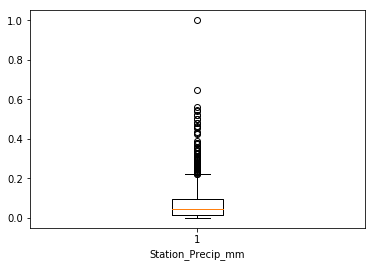

In [16]:
# boxplots  to check the outliers
plt.boxplot(train_set.station_precip_mm)
plt.xlabel("Station_Precip_mm")

Text(0.5,0,'ndvi_ne')

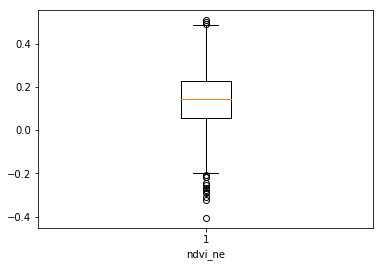

In [17]:
plt.boxplot(train_set.ndvi_ne)
plt.xlabel('ndvi_ne')

Text(0.5,0,'ndvi_nw')

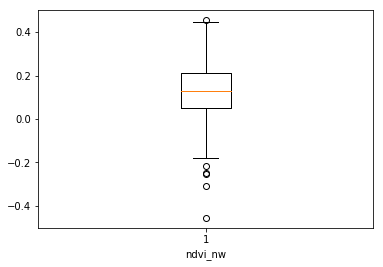

In [18]:
plt.boxplot(train_set.ndvi_nw)
plt.xlabel('ndvi_nw')

Text(0.5,0,'reanalysis_precip_amt_kg_per_m2')

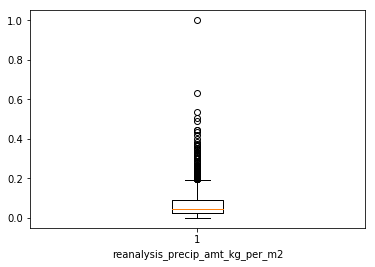

In [19]:
plt.boxplot(train_set.reanalysis_precip_amt_kg_per_m2)
plt.xlabel('reanalysis_precip_amt_kg_per_m2')

In [20]:
# correlation matrix between the attributes
train_set.corr()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
city,1.000000,0.547101,0.000020,0.688889,0.680885,0.468690,0.574001,0.314268,-0.453559,-0.054451,...,0.672200,0.314268,0.168309,0.900820,0.187758,0.827971,0.578739,-0.424356,0.355095,-0.292624
year,0.547101,1.000000,-0.071649,0.205884,0.140678,0.231659,0.274705,0.203856,-0.139435,0.084691,...,0.334953,0.203856,0.160925,0.488506,0.046404,0.368825,0.225454,-0.213467,0.217847,-0.306806
weekofyear,0.000020,-0.071649,1.000000,0.049444,0.047594,0.119702,0.067653,0.116628,0.421344,0.458876,...,-0.015034,0.116628,0.347188,0.077126,0.361177,0.022764,0.229398,0.288767,0.065263,0.216452
ndvi_ne,0.688889,0.205884,0.049444,1.000000,0.806847,0.586294,0.644054,0.190066,-0.319536,-0.035212,...,0.439858,0.190066,0.087625,0.646819,0.166472,0.616125,0.451473,-0.293808,0.230059,-0.157320
ndvi_nw,0.680885,0.140678,0.047594,0.806847,1.000000,0.551378,0.647425,0.188732,-0.312666,-0.030483,...,0.444201,0.188732,0.098957,0.638993,0.197132,0.632368,0.481399,-0.297125,0.217107,-0.137254
ndvi_se,0.468690,0.231659,0.119702,0.586294,0.551378,1.000000,0.820924,0.074301,-0.156891,0.051201,...,0.214727,0.074301,0.028724,0.484184,0.087292,0.440025,0.288524,-0.249873,0.129389,-0.117769
ndvi_sw,0.574001,0.274705,0.067653,0.644054,0.647425,0.820924,1.000000,0.123448,-0.226935,0.022461,...,0.310370,0.123448,0.053285,0.567162,0.118166,0.533186,0.374026,-0.292036,0.156475,-0.137221
precipitation_amt_mm,0.314268,0.203856,0.116628,0.190066,0.188732,0.074301,0.123448,1.000000,-0.017219,0.106268,...,0.499775,1.000000,0.450606,0.201322,0.223063,0.191542,0.295173,0.076422,0.483763,-0.038670
reanalysis_air_temp_k,-0.453559,-0.139435,0.421344,-0.319536,-0.312666,-0.156891,-0.226935,-0.017219,1.000000,0.901777,...,-0.402338,-0.017219,0.508380,-0.280375,0.609638,-0.257098,0.226277,0.719191,-0.173012,0.264564
reanalysis_avg_temp_k,-0.054451,0.084691,0.458876,-0.035212,-0.030483,0.051201,0.022461,0.106268,0.901777,1.000000,...,-0.168371,0.106268,0.612484,0.124200,0.741190,0.106129,0.509621,0.579693,-0.047698,0.151415


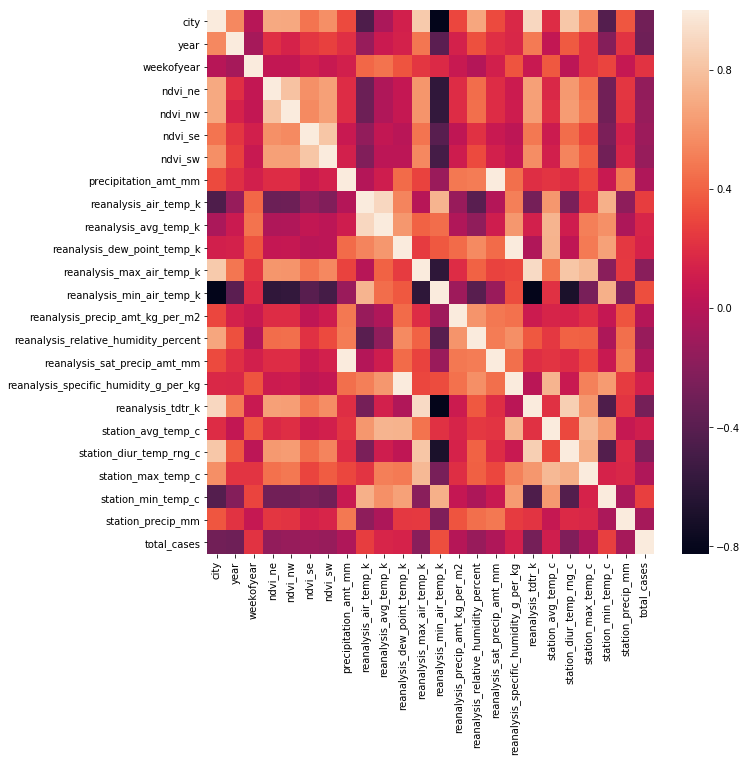

In [21]:
# Plot to show the correlation values
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr())

In [22]:
# based on the correlation values which are highly correlated 
# removing those attributes
train_set.drop('reanalysis_sat_precip_amt_mm',axis=1,inplace=True)
train_set.drop('reanalysis_specific_humidity_g_per_kg',axis=1,inplace=True)
train_set.drop('reanalysis_max_air_temp_k',axis=1,inplace=True)

In [23]:
y=label_set.total_cases

In [24]:
# Replacing the attribute values with standard deviation of outliers values
columns=train_set.columns[3:21]
for j in range(0,3):
    for i in columns:
        Q1=train_set[i].quantile(0.25)
        Q3=train_set[i].quantile(0.75)
        IQR=Q3-Q1
        cond=((train_set[i] < (Q1-1.5*IQR))|(train_set[i] > (Q3+1.5*IQR)))
        train_set.loc[cond,i]=train_set[cond][i].std()

In [25]:
# now again checking for null values
train_set.isnull().sum()

city                                    0
year                                    0
weekofyear                              0
ndvi_ne                                 0
ndvi_nw                                 0
ndvi_se                                 0
ndvi_sw                                 0
precipitation_amt_mm                    0
reanalysis_air_temp_k                   0
reanalysis_avg_temp_k                   0
reanalysis_dew_point_temp_k             0
reanalysis_min_air_temp_k               0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_tdtr_k                       0
station_avg_temp_c                      0
station_diur_temp_rng_c                 0
station_max_temp_c                      0
station_min_temp_c                      0
station_precip_mm                       0
total_cases                             0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x179406f35f8>,
 'caps': [<matplotlib.lines.Line2D at 0x179406f3e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x179406f30b8>],
 'medians': [<matplotlib.lines.Line2D at 0x179406fb6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x179406fbb00>],
 'means': []}

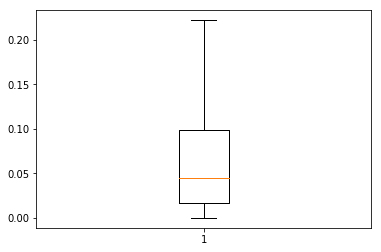

In [26]:
# now again plotting the boxplot for station_precip_mm
plt.boxplot(train_set.station_precip_mm)

In [27]:
train_set.describe()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.357143,2001.031593,26.503434,0.146869,0.132571,0.198928,0.190975,0.108266,0.537544,0.539153,...,6.782540e-01,0.059629,0.597039,0.240427,0.614661,0.309275,0.371337,0.676399,0.060442,11.759742
std,0.479322,5.408314,15.019437,0.125369,0.115334,0.067270,0.074739,0.091951,0.179492,0.156572,...,1.971309e-01,0.044455,0.174794,0.239457,0.138598,0.182539,0.123491,0.153729,0.052783,11.771912
min,0.000000,1990.000000,1.000000,-0.200000,-0.178625,0.028343,0.001185,0.000000,0.000000,0.000000,...,8.439002e-34,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,0.059375,0.051850,0.152607,0.137046,0.024475,0.400472,0.419556,...,5.384615e-01,0.023138,0.476186,0.066212,0.524316,0.177123,0.283871,0.587156,0.016289,3.000000
50%,0.000000,2002.000000,26.500000,0.142294,0.130300,0.194842,0.183779,0.097721,0.532295,0.544444,...,7.153846e-01,0.047975,0.553174,0.102240,0.636778,0.249683,0.393548,0.688073,0.045003,7.000000
75%,1.000000,2005.000000,39.250000,0.233839,0.213968,0.242693,0.234896,0.168555,0.686355,0.661333,...,8.461538e-01,0.091223,0.692119,0.419182,0.715805,0.438403,0.464516,0.788991,0.098656,18.000000
max,1.000000,2010.000000,53.000000,0.488400,0.445000,0.376643,0.382057,0.384869,1.000000,1.000000,...,1.000000e+00,0.192989,1.000000,0.925998,1.000000,0.798162,0.709677,1.000000,0.221977,48.000000


In [28]:
# Splitting the train dataset into train and test samples
print(len(train_set.index))
train_set.drop('total_cases',axis=1,inplace=True)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_set,y,test_size=0.25,random_state=10)

1456


# Preparing the model

In [29]:
# selecting the  models
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn import metrics

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
# preparing the model
model_rf = RandomForestRegressor(n_estimators=500,random_state=200,criterion="mse")
model_rf=AdaBoostRegressor(learning_rate=0.1,n_estimators=10)

In [31]:
# fitting the model with train dataset
model_rf.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=10, random_state=None)

In [32]:
# predicting the model with test sample
pred=model_rf.predict(x_test)

In [33]:
import math
print("Mean Squared error:",math.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Squared error: 34.50204851071967


In [34]:
# checking the performance of model using mean absolute error
print("Mean Absolute error:",metrics.mean_absolute_error(y_test,pred))

Mean Absolute error: 17.42608687455433


In [35]:
# Selecting the neural network model
from sklearn.neural_network import MLPRegressor
model_nn = MLPRegressor(random_state=100)

In [36]:
# training the model with train dataset 
model_nn.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=100,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
# predicting the model with test sample
pred_nn = model_nn.predict(x_test)

In [38]:
# printing the mean absolute error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,pred_nn))

Mean Absolute Error: 27.078039177648293


In [62]:
print(" Mean squared error : ",math.sqrt(metrics.mean_squared_error(y_test,pred_nn)))

 Mean squared error :  46.32439412389286


In [40]:
# Reading the test dataset
test_set = pd.read_csv("F:/Study/KE Lab/competition/dengue_features_test.csv")

# Test Data set Preprocessing

In [41]:
# changing the city values 
test_set.city=test_set.city.apply(enc)

In [42]:
# printing the first five values
test_set.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,0,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,0,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,0,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,0,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [43]:
#replacing the null values with means of respective columns
cols = test_set.columns[4:24]
for i in cols:
    mean_c = test_set[i].mean()
    test_set[i].fillna(mean_c,inplace=True)

In [44]:
# Sclaing the values between 0 and 1
test_set.iloc[:,9:24]=scaler.fit_transform(test_set.iloc[:,9:24])

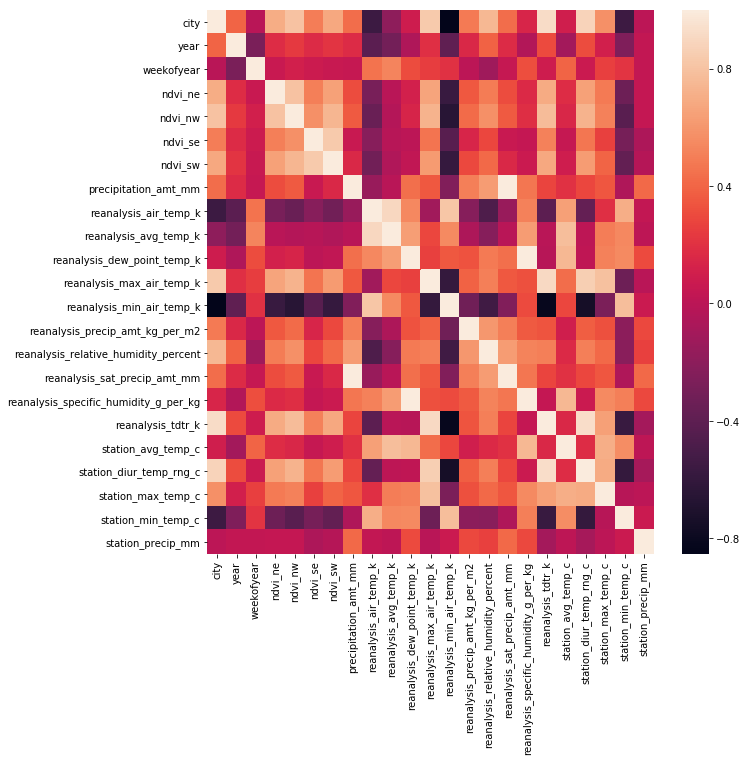

In [45]:
# Plot to show the correlation values
plt.figure(figsize=(10,10))
sns.heatmap(test_set.corr())

In [46]:
# dropping the attributes with high correlation
test_set.drop("week_start_date",axis=1,inplace=True)
test_set.drop('reanalysis_sat_precip_amt_mm',axis=1,inplace=True)
test_set.drop('reanalysis_specific_humidity_g_per_kg',axis=1,inplace=True)
test_set.drop('reanalysis_max_air_temp_k',axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x179419b1a58>,
 'caps': [<matplotlib.lines.Line2D at 0x179419b1f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x179419b1518>],
 'medians': [<matplotlib.lines.Line2D at 0x179419bab38>],
 'fliers': [<matplotlib.lines.Line2D at 0x179419baf60>],
 'means': []}

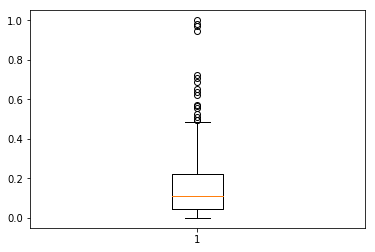

In [47]:
# boxplot for station_precip_mm
plt.boxplot(test_set.station_precip_mm)

In [48]:
# Replacing the attribute values with standard deviation of outliers values
columns=test_set.columns[3:20]
for j in range(0,3):
    for i in columns:
        Q1=test_set[i].quantile(0.25)
        Q3=test_set[i].quantile(0.75)
        IQR=Q3-Q1
        cond=(test_set[i] < (Q1-1.5*IQR))|(test_set[i] > (Q3+1.5*IQR))
        test_set.loc[cond,i]=test_set[cond][i].std()

In [49]:
# again checking for null values
test_set.isnull().sum()

city                                    0
year                                    0
weekofyear                              0
ndvi_ne                                 0
ndvi_nw                                 1
ndvi_se                                 0
ndvi_sw                                 1
precipitation_amt_mm                    0
reanalysis_air_temp_k                   0
reanalysis_avg_temp_k                   0
reanalysis_dew_point_temp_k             0
reanalysis_min_air_temp_k               1
reanalysis_precip_amt_kg_per_m2         1
reanalysis_relative_humidity_percent    0
reanalysis_tdtr_k                       0
station_avg_temp_c                      0
station_diur_temp_rng_c                 0
station_max_temp_c                      1
station_min_temp_c                      0
station_precip_mm                       0
dtype: int64

In [50]:
# again replacing the null values with means
cols = test_set.columns[3:20]
for i in cols:
    mean_c = test_set[i].mean()
    test_set[i].fillna(mean_c,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x179415a7748>,
 'caps': [<matplotlib.lines.Line2D at 0x179415a7f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x179415a7208>],
 'medians': [<matplotlib.lines.Line2D at 0x179415b0828>],
 'fliers': [<matplotlib.lines.Line2D at 0x179415b0c50>],
 'means': []}

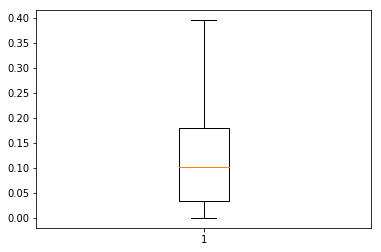

In [51]:
plt.boxplot(test_set.station_precip_mm)

In [52]:
# data types of all attributes
test_set.dtypes

city                                      int64
year                                      int64
weekofyear                                int64
ndvi_ne                                 float64
ndvi_nw                                 float64
ndvi_se                                 float64
ndvi_sw                                 float64
precipitation_amt_mm                    float64
reanalysis_air_temp_k                   float64
reanalysis_avg_temp_k                   float64
reanalysis_dew_point_temp_k             float64
reanalysis_min_air_temp_k               float64
reanalysis_precip_amt_kg_per_m2         float64
reanalysis_relative_humidity_percent    float64
reanalysis_tdtr_k                       float64
station_avg_temp_c                      float64
station_diur_temp_rng_c                 float64
station_max_temp_c                      float64
station_min_temp_c                      float64
station_precip_mm                       float64
dtype: object

In [53]:
# predicting the test dataset with random forest regressor model
test_pred = model_rf.predict(test_set)

In [54]:
# the predicted values from test dataset
test_pred

array([10.36150235, 10.36150235, 10.36150235, 10.36150235, 10.36150235,
       10.36150235, 10.36150235, 10.36150235, 16.44864865, 29.        ,
       29.        , 29.        , 29.        , 31.5042735 , 33.67832168,
       86.2       , 33.67832168, 86.2       , 97.        , 78.17460317,
       78.17460317, 12.50847458, 10.48648649, 31.5042735 , 12.50847458,
       10.82103321, 16.44864865, 16.44864865, 12.50847458, 12.50847458,
       10.82103321, 10.82103321, 10.82103321, 10.82103321, 10.36150235,
       10.34094617, 10.34094617, 10.36150235, 10.36150235, 10.36150235,
       10.34094617, 10.34094617, 10.34094617, 10.34094617, 10.34094617,
       10.34094617, 10.34094617, 10.34094617, 10.34094617, 10.34094617,
       10.34094617, 10.34094617, 10.36150235, 10.34094617, 10.36150235,
       10.36150235, 10.36150235, 10.36150235, 10.36150235, 10.48648649,
       10.48648649, 10.36150235, 86.2       , 33.67832168, 33.67832168,
       86.2       , 86.2       , 86.2       , 33.67832168, 78.17

In [55]:
# creating the output file for submission
output = test_set.iloc[:,0:3]

In [56]:
output['total_cases']=test_pred

In [57]:
output.loc[output.city==0,'city']='sj'
output.loc[output.city==1,'city']='iq'

In [58]:
# rounding off the values
output.total_cases=output.total_cases.apply(np.round)

In [59]:
# converting the datatype to integer 
output.total_cases=output.total_cases.astype(int)

In [60]:
output.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int32
dtype: object

In [61]:
# creating a csv file
output.to_csv('Submit1.csv',index=None)